# Algorithm Trading SMA
---

In [10]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

### 1. Read data as a dataframe

In [11]:
data_path = 'stock_data/'
df = pd.read_csv(data_path + '600000_浦发银行' + '.csv')
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,4/01/2000,3.005759,2.885668,2.912484,2.981274,38562183,1.814433
1,5/01/2000,3.029077,2.932305,2.981274,2.947462,45052693,1.793855
2,6/01/2000,3.066387,2.920646,2.935803,3.030243,53430896,1.844237
3,7/01/2000,3.206298,3.045400,3.066387,3.136342,183161852,1.908809
4,10/01/2000,3.247105,3.114190,3.148002,3.177150,141859094,1.933645


### 2. Compute SMA

In [12]:
df['SMA5'] = df['Adj Close'].rolling(5).mean()
df['SMA10'] = df['Adj Close'].rolling(10).mean()
df['SMA_diff'] = df['SMA5'] - df['SMA10']

### 3. Compute daily profit

In [13]:
df['Adj Close T-1'] = df['Adj Close'].shift(1)
df['Daily profit'] = df['Adj Close'] - df['Adj Close T-1']
df['Daily return'] = df['Daily profit']/df['Adj Close']

### 4. Compute position
#### Our strategy is that whenever the fast line SMA5 is higher than the SMA10 slow line, we long and hold 1 share, otherwise we short.

In [14]:
df['Position'] = [1 if df.loc[ind,'SMA_diff'] > 0 else 0 for ind in df.index]
df['My daily profit'] = df['Daily profit'] * df['Position']
df['My cumulative profit'] = df['My daily profit'].cumsum()
df['My daily return'] = df['Daily return'] * df['Position']
# display average return based on the number of days we have held the stock
daily_ret_avg = df['My daily return'].sum() / df['Position'].sum()
print(daily_ret_avg)
print(df['Position'].sum())
df.head(20)

0.0017297208889273086
2528


,Date,High,Low,Open,Close,Volume,Adj Close,SMA5,SMA10,SMA_diff,Adj Close T-1,Daily profit,Daily return,Position,My daily profit,My cumulative profit,My daily return
0,4/01/2000,3.005759,2.885668,2.912484,2.981274,38562183,1.814433,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
1,5/01/2000,3.029077,2.932305,2.981274,2.947462,45052693,1.793855,NaN,NaN,NaN,1.814433,-0.020578,-0.011471,0,-0.000000,0.000000,-0.000000
2,6/01/2000,3.066387,2.920646,2.935803,3.030243,53430896,1.844237,NaN,NaN,NaN,1.793855,0.050381,0.027318,0,0.000000,0.000000,0.000000
3,7/01/2000,3.206298,3.045400,3.066387,3.136342,183161852,1.908809,NaN,NaN,NaN,1.844237,0.064573,0.033829,0,0.000000,0.000000,0.000000
4,10/01/2000,3.247105,3.114190,3.148002,3.177150,141859094,1.933645,1.858996,NaN,NaN,1.908809,0.024836,0.012844,0,0.000000,0.000000,0.000000
5,11/01/2000,3.182979,3.045400,3.177150,3.054728,80543448,1.859138,1.867937,NaN,NaN,1.933645,-0.074507,-0.040076,0,-0.000000,0.000000,-0.000000
6,12/01/2000,3.031409,2.891498,3.031409,2.928807,302548283,1.782502,1.865666,NaN,NaN,1.859138,-0.076636,-0.042994,0,-0.000000,0.000000,-0.000000
7,13/01/2000,2.943964,2.891498,2.914816,2.903157,68406039,1.766890,1.850197,NaN,NaN,1.782502,-0.015612,-0.008836,0,-0.000000,0.000000,-0.000000
8,14/01/2000,2.914816,2.787730,2.900825,2.821542,153198958,1.717219,1.811879,NaN,NaN,1.766890,-0.049671,-0.028925,0,-0.000000,0.000000,-0.000000
9,17/01/2000,2.849524,2.769075,2.807551,2.844861,69485695,1.731411,1.771432,1.815214,-0.043782,1.717219,0.014192,0.008197,0,0.000000,0.000000,0.000000


compare with alipay fund:
1. annualized 7-day avg daily return of 2.0050%,which means on avg alipay fund daily return will be 2.0050%/365=0.0000548
2. our avg investment daily ret 0.004806 is much higher


### 5. Plot cumulative return

<AxesSubplot:xlabel='Date'>

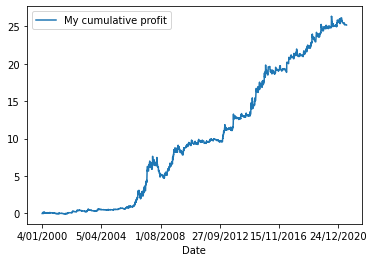

In [15]:
df.plot(x='Date', y='My cumulative profit')

Some of you might be wondering what's the point doing all of these in python while Excel can get the job done too. The following step will show you why.

### 6. Test our strategy on all stocks

In [16]:
# define a function to test our strategy
def test_strategy(stockCode):
    df = pd.read_csv(stockCode)
    df['SMA5'] = df['Adj Close'].rolling(5).mean()
    df['SMA10'] = df['Adj Close'].rolling(10).mean()
    df['SMA_diff'] = df['SMA5'] - df['SMA10']
    df['Adj Close T-1'] = df['Adj Close'].shift(1)
    df['Daily profit'] = df['Adj Close'] - df['Adj Close T-1']
    df['Daily return'] = df['Daily profit']/df['Adj Close']
    df['Position'] = [1 if df.loc[ind,'SMA_diff'] > 0 else 0 for ind in df.index]
    df['My daily profit'] = df['Daily profit'] * df['Position']
    df['My cumulative profit'] = df['My daily profit'].cumsum()
    df['My daily return'] = df['Daily return'] * df['Position']
    daily_ret_avg = df['My daily return'].sum()/df['Position'].sum()
    return daily_ret_avg, df

In [17]:
# get all stock codes from stock data dir
data_path = 'stock_data/'
stock_codes = [i for i in os.walk(data_path)][0][2]
# print(stock_codes)

600000_浦发银行.csv 0.0017297208889273086
600004_白云机场.csv 0.0014793436172850281
600006_东风汽车.csv 0.002067568211060358
600007_中国国贸.csv 0.0014864548277010304
600008_首创股份.csv 0.0018863334186951936
600009_上海机场.csv 0.0018408327465379462
600010_包钢股份.csv 0.0024260994078370963
600011_华能国际.csv 0.0015945150939222655
600012_皖通高速.csv 0.0014867325368677184
600015_华夏银行.csv 0.001410115094795927
0.0017407715843629876


C:\Machine_Learning\sample_project_1\refix\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 28006 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Machine_Learning\sample_project_1\refix\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 21457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Machine_Learning\sample_project_1\refix\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 38134 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Machine_Learning\sample_project_1\refix\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 34892 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Machine_Learning\sample_project_1\refix\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 28006 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Machine_Learning\sample_project_1\

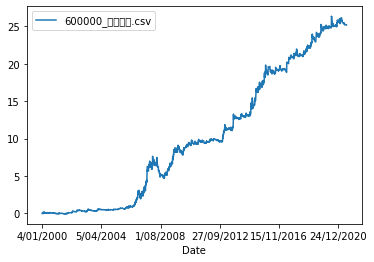

C:\Machine_Learning\sample_project_1\refix\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 30333 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Machine_Learning\sample_project_1\refix\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 20113 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Machine_Learning\sample_project_1\refix\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 26426 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Machine_Learning\sample_project_1\refix\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 22330 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Machine_Learning\sample_project_1\refix\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 30333 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Machine_Learning\sample_project_1\

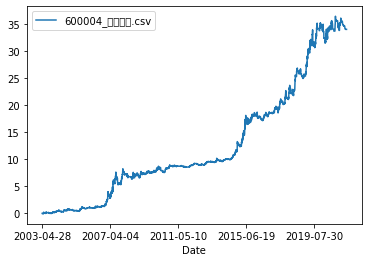

C:\Machine_Learning\sample_project_1\refix\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 19996 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Machine_Learning\sample_project_1\refix\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 39118 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Machine_Learning\sample_project_1\refix\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 27773 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Machine_Learning\sample_project_1\refix\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 36710 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Machine_Learning\sample_project_1\refix\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 19996 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Machine_Learning\sample_project_1\

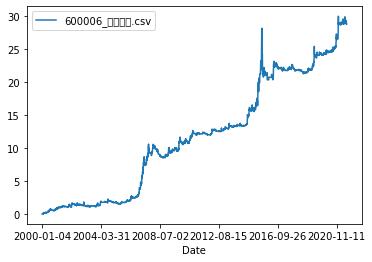

C:\Machine_Learning\sample_project_1\refix\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 20013 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Machine_Learning\sample_project_1\refix\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 22269 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Machine_Learning\sample_project_1\refix\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 36152 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Machine_Learning\sample_project_1\refix\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 20013 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Machine_Learning\sample_project_1\refix\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 22269 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Machine_Learning\sample_project_1\re

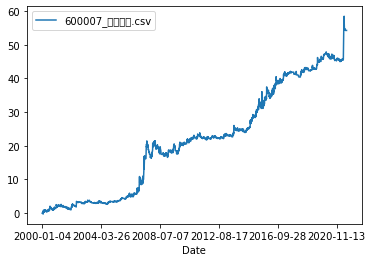

C:\Machine_Learning\sample_project_1\refix\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 39318 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Machine_Learning\sample_project_1\refix\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 21019 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Machine_Learning\sample_project_1\refix\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 32929 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Machine_Learning\sample_project_1\refix\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 20221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Machine_Learning\sample_project_1\refix\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 39318 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Machine_Learning\sample_project_1\

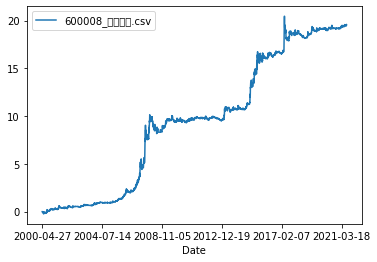

C:\Machine_Learning\sample_project_1\refix\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 19978 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Machine_Learning\sample_project_1\refix\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 28023 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Machine_Learning\sample_project_1\refix\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 19978 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Machine_Learning\sample_project_1\refix\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 28023 missing from current font.
  font.set_text(s, 0, flags=flags)


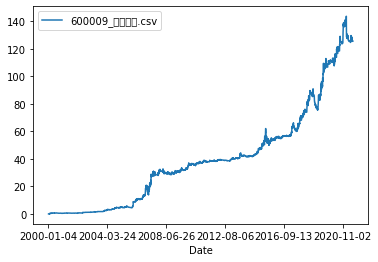

C:\Machine_Learning\sample_project_1\refix\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 21253 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Machine_Learning\sample_project_1\refix\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 38050 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Machine_Learning\sample_project_1\refix\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 21253 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Machine_Learning\sample_project_1\refix\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 38050 missing from current font.
  font.set_text(s, 0, flags=flags)


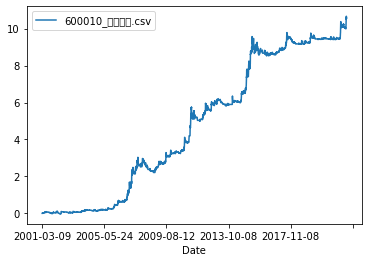

C:\Machine_Learning\sample_project_1\refix\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 21326 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Machine_Learning\sample_project_1\refix\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 33021 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Machine_Learning\sample_project_1\refix\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 38469 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Machine_Learning\sample_project_1\refix\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 21326 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Machine_Learning\sample_project_1\refix\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 33021 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Machine_Learning\sample_project_1\re

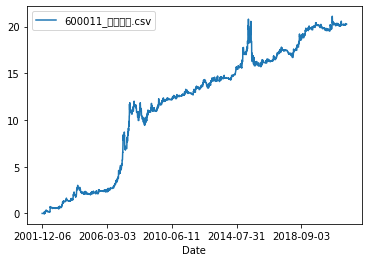

C:\Machine_Learning\sample_project_1\refix\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 30358 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Machine_Learning\sample_project_1\refix\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 36890 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Machine_Learning\sample_project_1\refix\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 39640 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Machine_Learning\sample_project_1\refix\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 36895 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Machine_Learning\sample_project_1\refix\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 30358 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Machine_Learning\sample_project_1\

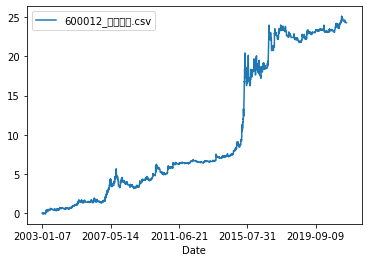

C:\Machine_Learning\sample_project_1\refix\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 22799 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Machine_Learning\sample_project_1\refix\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 22799 missing from current font.
  font.set_text(s, 0, flags=flags)


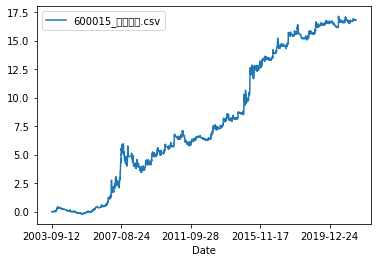

In [18]:
# start testing and plot individually
stock_returns = []
for each_stock in stock_codes[:10]:
    stock_return, stock_df = test_strategy(data_path + each_stock)
    stock_returns.append(stock_return)
    print(each_stock, stock_return)
    stock_df.plot(x='Date',y='My cumulative profit',label=each_stock)
print(np.array(stock_returns).mean())

0.0017407715843629876


C:\Machine_Learning\sample_project_1\refix\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 28006 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Machine_Learning\sample_project_1\refix\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 21457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Machine_Learning\sample_project_1\refix\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 38134 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Machine_Learning\sample_project_1\refix\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 34892 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Machine_Learning\sample_project_1\refix\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 30333 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Machine_Learning\sample_project_

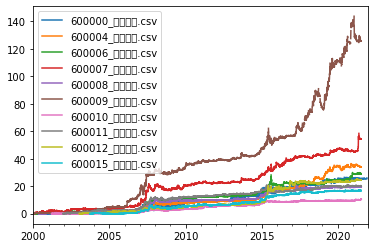

In [14]:
# start testing and plot all on one plot

stock_returns = []
# create an empty df with date as its index 
stock_dfs = pd.DataFrame(index=pd.date_range('1/1/2000','1/1/2022'))
for each_stock in stock_codes[:10]:
    stock_return, stock_df = test_strategy(data_path + each_stock)
    stock_returns.append(stock_return)
    
    # convert date column to datetime format, and set as index
    stock_df['Date'] = pd.to_datetime(stock_df['Date'])
    stock_df.set_index('Date',inplace=True)
    # merge two tables on their index, don't forget stock_dfs = 
    stock_dfs = stock_dfs.join(stock_df['My cumulative profit'])
    # rename the column name to avoid duplicate
    stock_dfs.rename(columns={'My cumulative profit':each_stock},inplace=True)
stock_dfs.plot()
stock_dfs.head()
print(np.array(stock_returns).mean())

limitations: 
1. we are not tracking our cost, and thus we are unable to have a stop loss/stop profit policy
2. trading by SMA may be too simple for us to deploy, we can look at multiple indicators to aid our trading 
3. the timing of buy/sell is too perfect, in reality, we have to wait until the next day to buy after we know the SMA5 is higher than SMA10, and the same applies when we want to sell
4. equal weights when computing our avg daily ret, should probably assign more weights to recent dates
3. the survivor bias

